<a href="https://colab.research.google.com/github/Mrfrktmrck19/Data_Science/blob/master/ML_For_DS/ML4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SINIFLANDIRMA MODELLERİ

* Lojistic Regression
* Naive Bayes
* K-Neirest Neighbors (K-NN)
* Support Vector Regression (SVR)
* Artiicial Neural Network (ANN)
* Classification & Regression Trees (CART)
* Bagging (Bootstrap Aggregation)
* Random Forest (RF)
* Gradient Boosting Machines (GBM)
* Extreme Gradient Boosting (XGBosst)
* LightGBM
* CatBoost

Sınıflandırma algoritmaların başarısı, yanlış/doğru sınıflandırma oranı ile ölçülür. Makine öğrenmesine girişte gördüğümüz yöntemler ile (Confused Matrix)

## Başta Yüklenecek Olan Kütüphaneler ve Veri Seti

### Kütüphaneler

In [2]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.5 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


### Veri Setini Hikayesi

Hamilelik, glukoz miktarı, kan basıncı, deri kalınlığı, insülin, yaş gibi değişkenlere bakarak kişilerin Diyabet Hastası olup olmadıklarını gösteren bir veri seti. Çıktılar, veri setinin kendisinde 0-1 one hot encoding yapılmış.

In [7]:
diabets = pd.read_csv("/content/gdrive/MyDrive/Data Science/Kendi Yazılarım/diabetes.csv")
df = diabets.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 60.0 KB


In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

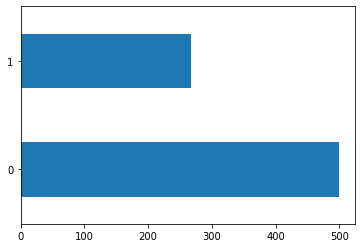

In [10]:
df["Outcome"].value_counts().plot.barh()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [12]:
y = df["Outcome"]
X = df.drop(["Outcome"],axis = 1 )

## LOGISTIC REGRSSION

### Teori

Amaç, sınıflandırma problemi için bağımlı değişken ile bağımsız değişkenler arasındaki ilişkiyi tanımlayan doğrusal bir model kurmaktır. 

Lojistik yerine Doğrusal Reg kullanamaz mıyız, sonuçta aynı diyebilirsin. İki sonucu olan bir çıktı (0-1, False-True) için evet kullanılabilir ama sonuçlar dağınıksa çok işlevsiz olur. "1'den yukari için x, aşşğısı için y"de dersek yetersiz oluyor. R2 değeri düşük olur bu seferde modelimiz. İşte sonucu 1 ve 0'a çok iyi sabitlediği için Lojistik Regresyonu tercih ediyoruz.

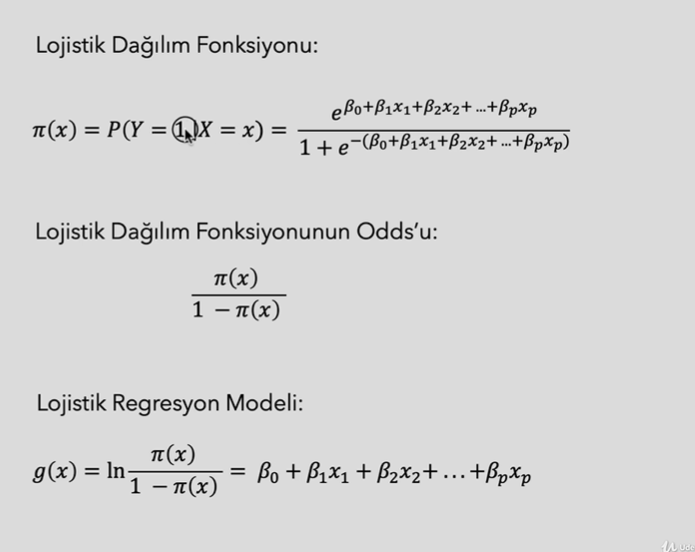

Burada da doğrusallığa gidiyoruz. Bunu zaten istiyoruz. Çünkü doğrusallık bize daha kolay yorumlanabilirlik sağlıyor. Bu doğrusallığı istememizi Derin Öğrenmede ki Türevlenebilir fonksiyon istememiz ile kıyaslama. Orada gündelik hayat problemlerinin karmaşıklığını bilgisayarda daha iyi temsil edebilmek için karmaşıklığı arttırmak adına türevlenebilir (eğimi alınabilir) bir halde olmasını istiyoruz.

Lojistik Rgresyon hala kullanılır, yüzlerce binlerce değişkenin kullanıldığı setlerde de. Çünkü çok kolay yorumlanabilirlik sağlamaktadır.

**Lojistik Regresyon  Özellikleri:**
* Bağımlı değişken kategoriktir. 
* Adını bağımlı değişkene uygulanan logit dönüşümden alır.
* Doğrual Regresyonda aranan varsayımlar burada aranmadığı için daha esnek kullanılabilirliği vardır.
* Bağımlı değişkenin 1 olarak tanımlanan deperinin gerçekleşme olasılığı hesaplanır. Dolayısıyla bağımı değişkenin alacağı değer ile ilgilenilmez.
* Lojistik fonksiyonu sayesinde üretilen değerler 0-1 arasında olur.

### Uygulama

#### 1.Model

In [13]:
## statsmodel ile başlayalım
loj = sm.Logit(y, X)
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sat, 18 Feb 2023   Pseudo R-squ.:                 0.05922
Time:                        10:21:59   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

In [14]:
## sklearn

In [15]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [16]:
loj_model.intercept_

array([-5.89249766])

In [17]:
loj_model.coef_

array([[ 1.17061865e-01,  2.83893855e-02, -1.68880903e-02,
         7.55635388e-04, -6.42919999e-04,  5.97757973e-02,
         6.77489484e-01,  7.24167534e-03]])

#### 2.Tahmin ve Model Tunning

Lojistik Regresyonun dışsal bir parametresi (hiperparametresi) yok. Burada optimize eilebilecek parametre olarak değerlendirilebilecek tek şey sabit katsayısı. Dolayısıyla burada tam bir model tuning değil doğrulama işlemi gerçekleştireceğiz.

Başlamadan outcome'ın çıktılarını, neyin 0 neyin 1 olduğunu kotnrol et. Başlangıçta en sık yapılan hata sınıf değerlerini karıştırarak işlem yapmak oluyor.

Karmaşıklık Matisi oluşturma ve Accurcy Score'una nasıl ulaşabileceğimizi görelim:

In [18]:
y_pred = loj_model.predict(X) #test train olarak ayırmadık çünkü önce modeli anlamaya çalışıyoruz. Daha sonra ayırıp işlem yapacağız.

In [19]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]])

Return edilen array, aşşağıdaki sıralamayı takip eder:

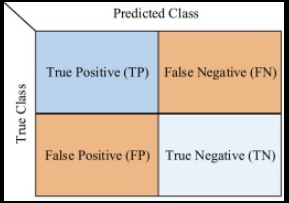

In [20]:
#doğru sınıflandırma oranımız:
accuracy_score(y, y_pred)

0.7747395833333334

In [21]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [22]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [23]:
# bana tahmin değerlerini değilde, gerçekleşme olasılığını görmek istiyotsak (yani oalsılık):
loj_model.predict_proba(X)[0:10]

array([[0.35038581, 0.64961419],
       [0.91703384, 0.08296616],
       [0.22474952, 0.77525048],
       [0.92140079, 0.07859921],
       [0.16726037, 0.83273963],
       [0.79899939, 0.20100061],
       [0.88020685, 0.11979315],
       [0.27812564, 0.72187436],
       [0.32058587, 0.67941413],
       [0.92275333, 0.07724667]])

İlk sütun 0'ları, ikinci sütun 1'lere ait değerlerin olasılıklarını verir.

In [24]:
loj_model.predict_proba(X)[0:10][:,0:1] # 0 olma olasılıkları

array([[0.35038581],
       [0.91703384],
       [0.22474952],
       [0.92140079],
       [0.16726037],
       [0.79899939],
       [0.88020685],
       [0.27812564],
       [0.32058587],
       [0.92275333]])

In [25]:
y[0:10] # gerçek değerler

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

Şöyle bir senaryomuz olsun: Biz kendimizin belirlediği bir eşik değere göre seçim yapalım. 1 sütunumuzdaki olasılığı 0.6'dan fazla olan değerleri 1 kabul edip geri kalanı 0 edelim.

Bu senaryo tuhaf gelirse şaşırma, gerçek hayatta çok kullanılıyor. Bir hasta geldiğinde ona şeker hastası diyebilmemiz için %80 güven değeri gibi değerler oluyr. Ya da bir hastayı tedavi edeceğimiz zaman belli bir tedaviyi uygulamak için %70'ten fazla olasılık çıkması gerrekiyor gibi use-caseler mevcut.



```
y_pred = [1 if i > 0.59 else 0]
```
i 0.59'dan büyükse 1, değilse 0 yap.


In [26]:
y_probs = loj_model.predict_proba(X)

In [27]:
y_probs = y_probs[:,1]
y_probs  # tüm gözlemlerin 1 olma olasılığı 

array([0.64961419, 0.08296616, 0.77525048, 0.07859921, 0.83273963,
       0.20100061, 0.11979315, 0.72187436, 0.67941413, 0.07724667,
       0.22081877, 0.84281555, 0.70726969, 0.63332158, 0.59882714,
       0.52966173, 0.32344463, 0.2461632 , 0.39379873, 0.25473693,
       0.3661336 , 0.30511868, 0.87575816, 0.33994989, 0.62893627,
       0.47132149, 0.65866563, 0.08795204, 0.55239768, 0.26943673,
       0.37674972, 0.54949466, 0.09741218, 0.06834883, 0.44283645,
       0.21688975, 0.63459574, 0.38972017, 0.19777727, 0.49459666,
       0.7039307 , 0.6050581 , 0.14929114, 0.83412242, 0.61933243,
       0.89153919, 0.44797282, 0.0708014 , 0.39064316, 0.15293757,
       0.06944998, 0.14515654, 0.11763968, 0.75105852, 0.67861088,
       0.05494435, 0.83806777, 0.29083131, 0.69289558, 0.21491567,
       0.05138613, 0.50895261, 0.04962625, 0.371471  , 0.37479513,
       0.1647649 , 0.18779727, 0.35395952, 0.06731171, 0.33011032,
       0.22793198, 0.41844902, 0.72707595, 0.27854672, 0.08045

In [28]:
y_pred = [1 if i > 0.59 else 0 for i in y_probs]

In [29]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [30]:
confusion_matrix(y, y_pred)

array([[467,  33],
       [148, 120]])

In [31]:
accuracy_score(y, y_pred)   # doğru yaptığımız işler/tüm işler

0.7643229166666666

In [32]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.93      0.84       500
           1       0.78      0.45      0.57       268

    accuracy                           0.76       768
   macro avg       0.77      0.69      0.70       768
weighted avg       0.77      0.76      0.74       768



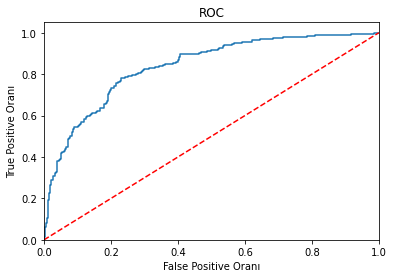

In [33]:
# Roc analizine de bakalım, confused matrix gibi Roc'ta bir başarı ölçme metoduydu. Eğrinin altında kalan alanı inceliyoruz.

logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=40)
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [35]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7402597402597403

In [36]:
cross_val_score(loj_model, X_test, y_test, cv = 10)

array([0.625     , 0.7826087 , 0.82608696, 0.73913043, 0.69565217,
       0.65217391, 0.73913043, 0.69565217, 0.86956522, 0.7826087 ])

In [37]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()  # bu doğrulanmış accuracy scorumuz

0.7407608695652174

Cross Validation train seti üzerinde hiperparametre optimizasyonu yaparken kullanılır evet fakat yukarıdaki gibi bazı değerlerimizin ölçümünde doğrulama yaparkende kullanılabilir.

## GAUSSIAN NAIVE BAYES

### Teori

Olasılık temelli bir modelleme tekniğidir. Amaç belirli bir örneğin her bir sınıfa ait olma olasılığının koşullu olasılık temelli hesaplanmasıdır. Spam mailler bu metod ile bulunmakadır.

Sektör tecrübesi: E-ticaretteki gibi çok fazla kategorik değişkenin olduğu veri setlerinde iyi çalışır. Ayrıca yanıt değişkenin değerlerinin çok olduğu buna karşılık bağımsız değişkenlerdeki  kategorik değişkenlerin neredeyse sürekli değişkenler kadar olduğu veri setlerinde de iyi çalışmaktadır. Bazen yanıt değişkenin sınıflarını indirgemek isteriz daha kolay olması için, eğer olmuyorsa Naive yine yardımımıza koşuyor.

Bu yöntemdede optimize edilbilecek bir hiperparametre yok.

### Uygulama

#### 1.Model ve Tahmin

In [38]:
 from sklearn.naive_bayes import GaussianNB

In [39]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [40]:
nb_model.predict(X_test)[0:10]

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0])

Düzensiz dağılmış veri setlerinin Train-Test oranlarını belirlemek çok önemlidir. %20 yaptığımızda bilemliyizki az olan değerlerden, çok olana göre az gelecek. O yüzden %30'a çıkarmak faydalı olur.

Hatta test-train setlerinin bağımlı değişkenlerinin sınıflarının dağılımını incelemeliyiz.

In [41]:
nb_model.predict_proba(X_test)[0:10]

array([[1.48539073e-06, 9.99998515e-01],
       [2.58148526e-01, 7.41851474e-01],
       [2.72170087e-01, 7.27829913e-01],
       [9.72748911e-01, 2.72510893e-02],
       [9.85549988e-01, 1.44500123e-02],
       [8.30426302e-01, 1.69573698e-01],
       [1.59492952e-03, 9.98405070e-01],
       [7.69536822e-02, 9.23046318e-01],
       [9.48433274e-01, 5.15667258e-02],
       [9.20942193e-01, 7.90578070e-02]])

In [42]:
y_pred = nb_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7359307359307359

In [43]:
cross_val_score(nb_model, X_test, y_test, cv=10).mean()

0.7405797101449275

Naive Bayes, model tuning olmadığı için cv ile modelin accuracy değerini doğrulama yapabiliyoruz.

## KNN

### Teori

Tahmninler gözlem benzerliğine göre yapılır. Daha önce gördüğümüzün benzer şekliyle çalışıyor. Regresyon erşne sınıflandırma var.

**KNN Özellikler:**
* Komşu sayısını belirle(k), hiperparametremiz
* Bilinmeyen nokta ile diğer tüm noktalar arasındaki uzaklıkları hesapla
* Uzaklıkları sırala ve belrilenen k sayısına göre en yakın olan k gözlemi seç
* Sınıflandırma ise en sık sınıf, regresyon ise ortalama değeri tahmin değeri oalrak ver.

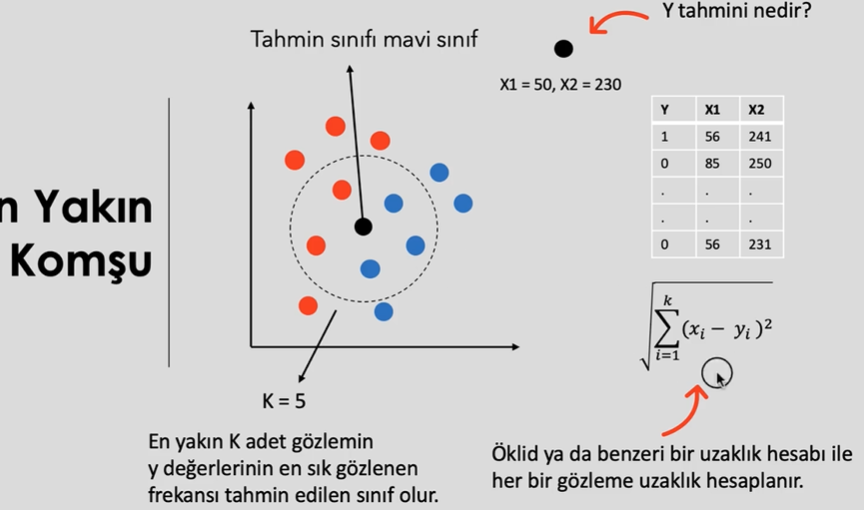

### Uygulama

#### 1.Model ve Tahmin

In [44]:
 knn = KNeighborsClassifier()
 knn_model = knn.fit(X_train, y_train)
 knn_model

KNeighborsClassifier()

In [45]:
y_pred = knn_model.predict(X_test)

In [46]:
accuracy_score(y_test, y_pred)

0.7229437229437229

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       142
           1       0.67      0.56      0.61        89

    accuracy                           0.72       231
   macro avg       0.71      0.69      0.70       231
weighted avg       0.72      0.72      0.72       231



#### 2.Model Tuning

K sayısı hiperparametremiz olacak. Burada optimize etmeye çalışacağız.

In [48]:
knn_params = {"n_neighbors":np.arange(1,50)}

In [49]:
knn = KNeighborsClassifier()
knn_cv_model = GridSearchCV(knn, knn_params, cv=10)
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [50]:
print("En iyi skor: ", knn_cv_model.best_score_)
print("En iyi parametreler: ", knn_cv_model.best_params_)

En iyi skor:  0.7411250873515025
En iyi parametreler:  {'n_neighbors': 18}


In [51]:
# final model
knn_tuned_model = KNeighborsClassifier(11).fit(X_train, y_train)

In [52]:
knn_tuned_model.score(X_test, y_test)

0.7445887445887446

In [53]:
accuracy_score(y_test,knn_tuned_model.predict(X_test)) # yukarıdaki fonksiyonla aynı işlev, predictlemekle uğraşmıyoruz.

0.7445887445887446

## SUPPORT VECTOR CLASSIFICATION/MACHINES - SVC-SVM

### Teori

Amaç, iki sınıf arasındaki ayrımı optimum sağlayacak hiper-düzlemi bulmaktır. 

Konuyur anlamak için önce Support Vector Regression'u hatırlayalım. SVR'da iki doğru arasına max nokta alabilmek amacımızdı. Max ve min marjinleri belirlemeye çalışıyor ve en önemlisi outlier değerlerden etkilenmiyordu SVR. SVClassification'da biraz böyle.

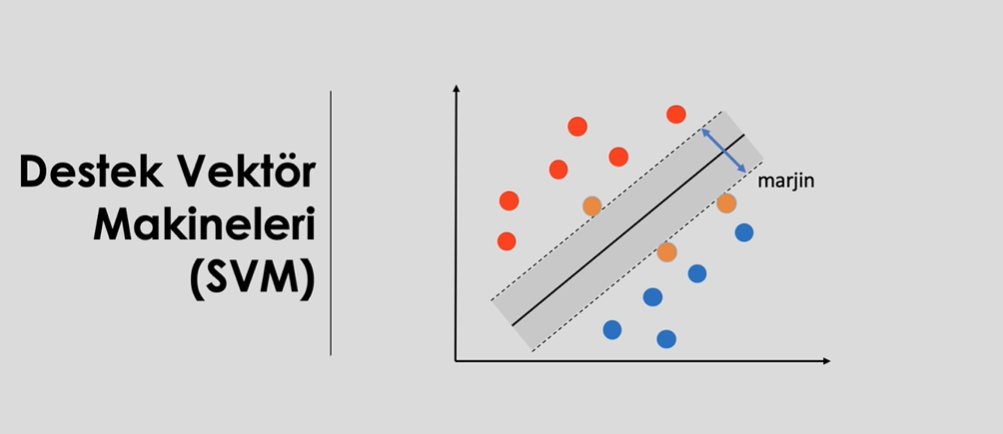

SVC'de ki amaç, marjini olabildiğince büyük yaparak noktalar arası mesafeyi büyüterek Noktaların sınıfsal değerlerini daha da ortaya çıkarmak. Tabii arada noktaların kaldığı oluyor, bu yüzdende farklı SVC türleri çıkmış.

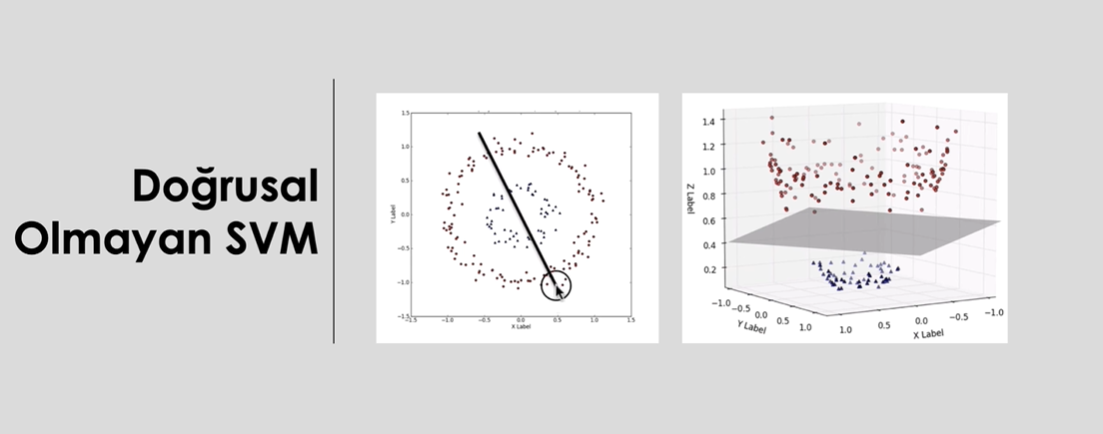

Radial Basis Func(Radyal Temelli Fonksiyon) SVC'si ise, yuakrıdaki sol resme bakıldığında; tek bir doğru ile sınıfları ayıramadığımızda bir boyut(diamension) arttırarak farklı olan bir açı yakalama peşinde. Böylelikle bir yerden olmasa da başka bir yerden ayırabiliyoruz.

Not: Şöyle bir düşüncem var, bu boyut arttırma, bağımsız değişken eklenmesi gibi bir şey olabilir mi? Notion'a ekliyorum.

### Uygulama - Doğrusal SVM

#### 1. Model ve Tahmin

In [54]:
svm_model = SVC(kernel = "linear").fit(X_train, y_train)

In [55]:
svm_model

SVC(kernel='linear')

In [56]:
y_pred = svm_model.predict(X_test)

In [57]:
accuracy_score(y_test, y_pred) # sınıflandırma başarısı

0.7705627705627706

#### 2. Model Tuning

In [59]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel = "linear")

svc_cv_model = GridSearchCV(svc,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [60]:
print("En iyi parametreler: ", svc_cv_model.best_params_)

En iyi parametreler:  {'C': 8}


In [61]:
svc_tuned = SVC(kernel = "linear", C = svc_cv_model.best_params_["C"]).fit(X_train, y_train)

In [62]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7575757575757576

### Uygulama - RBF SVM (Radial Basis Func SVM) (Lineer Olmayanda diyebilriiz)

#### 1. Model ve Tahmin

SVC'nin kernel parametresi default olarak "RBF"e ayarlı. Linear SVM'de belirtemiz gerektiği için yazdık.

In [63]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)
svc_model

SVC()

In [64]:
y_pred = svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

#### 2. Model Tuning

In [65]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

In [66]:
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [67]:
print("En iyi parametreler: " + str(svc_cv_model.best_params_))

En iyi parametreler: {'C': 1, 'gamma': 0.0001}


In [68]:
svc_tuned = SVC(C = svc_cv_model.best_params_["C"], gamma = svc_cv_model.best_params_["gamma"]).fit(X_train, y_train)

In [69]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7619047619047619

In [70]:
dir(svc_model) # parametreleri listeleyip gör

['C',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_dual_coef_',
 '_estimator_type',
 '_gamma',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_intercept_',
 '_more_tags',
 '_n_support',
 '_pairwise',
 '_probA',
 '_probB',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_pr

## ARTIFICIAL NEURAL NETWORK - ANN

Bu bölümde de kendi notlarımdan ilerledim, bu yüzden teori kısmını koymadım.

### Uygulama

#### 1. Model ve Tahmin

Neden bir standartlaşma kütüphanesi eklediğimizi açıklayalım:

Yapay sinir ağlarında değişkenlerin ölçekleri ve değişkenlerin birbirleriyle olan lişkileri birbirlerini etkileyebilmektedir. Bunun önüne geçmek için, bir değişkenin başka bir değişkene etkileyip sonucuna etki etmemesi, bir standartlaşma yapıp bir ölçeğe oturtacağız.

Korelasyondan hatırlarsan Sales bağımlı değişkenimize en çok etki eden bağımsız değişken TV idi. Fakat Radyo, TV'ye etkiliyorsa burada Korelasyon PRoblemi çıkıyordu htırlarsan.

Yapay Zeka dersinden hatırlayacağın üzere, veri setini ağa vermeden önce -1 ile 1 arasında ölçekliyorduk. Burada da bunu yapıyoruz. Hem hızlı öğrenme hemde korelasyon problemi için.

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[0:10]


array([[ 0.36201669,  0.48221932,  0.78166729,  1.29891793,  0.11972043,
         0.39069838, -0.53980577,  0.19054559],
       [-0.23431142,  2.10783978,  0.08580291,  0.1312651 ,  1.13045392,
         0.5642549 , -0.17140288,  0.27674861],
       [-0.83063952,  1.91659031,  0.4834397 ,  1.36037334,  1.9697237 ,
         1.01054308,  2.39533856, -0.93009365],
       [-1.12880358, -1.11152622, -0.01360629,  0.74581922, -0.67442732,
         0.48987353, -0.68475117, -0.67148459],
       [ 0.36201669,  1.18346736,  0.08580291, -1.22075397, -0.67442732,
        -0.2539401 , -0.77836174,  2.60423011],
       [-0.83063952, -0.98402658, -0.31183388, -0.48328902, -0.28637785,
        -0.57625934,  0.3479848 , -0.75768761],
       [ 0.9583448 , -0.21902872, -0.11301548, -1.22075397, -0.67442732,
         0.11796672, -0.62435725,  0.79396672],
       [-0.83063952, -3.85276856, -1.00769826,  0.00835427, -0.67442732,
        -0.88618169, -0.98068136, -0.93009365],
       [-0.53247547,  0.25909495

In [74]:
X_test_scaled[0:10]

array([[-2.34311416e-01,  1.66159103e+00,  6.82258094e-01,
         1.72910581e+00,  3.52192156e+00,  8.12192775e-01,
         5.04965117e+00, -6.71484593e-01],
       [ 3.62016691e-01,  7.37218609e-01,  6.82258094e-01,
         3.77086746e-01,  1.89752845e+00,  1.87915672e-02,
        -3.85362670e-02,  2.17321502e+00],
       [-2.34311416e-01,  1.69346594e+00, -5.10652273e-01,
         1.31265098e-01,  1.07630748e+00,  1.30363612e-01,
         3.87240842e-01,  2.76748611e-01],
       [-8.30639524e-01, -1.55278895e-01,  8.58029105e-02,
         4.99997571e-01, -6.74427317e-01, -5.51465551e-01,
        -7.87420828e-01, -1.01629667e+00],
       [-8.30639524e-01, -1.33465060e+00,  5.82848897e-01,
         3.15631334e-01, -3.40524288e-01, -7.99403428e-01,
         3.57043884e-01, -9.30093648e-01],
       [ 3.62016691e-01, -7.60902202e-01,  3.84030502e-01,
         4.38542158e-01, -6.74427317e-01,  4.65079746e-01,
        -2.61993757e-01,  1.65599691e+00],
       [ 2.74732912e+00,  1.024092

Bir ölçeğe oturtma, standartlaşma, işlemimiz bitti. Şimdi yemeği pişirmeye başlayabiliriz.

NOT: MLPC = Multi Layer Perceptron Classifier

In [75]:
from sklearn.neural_network import MLPClassifier

In [76]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train) #bilerek başta argüman girmeyeceğiz

In [77]:
mlpc.coefs_ # katman sayısı, percepron sayısı, ne istersen gidip ulaşabilirsin. Biraz araştırman yeterli.

[array([[-2.20530888e-01,  2.23775471e-01, -2.16250665e-01,
         -3.26416286e-01, -1.59214680e-01, -2.39804371e-01,
         -2.64424637e-01,  3.88223391e-02,  1.24032469e-02,
         -1.49908747e-01,  3.15685639e-01, -8.08451560e-04,
          6.81344724e-04, -2.60363403e-01, -3.17240035e-01,
          6.65847227e-02, -4.93592677e-02, -1.96068384e-01,
         -1.97217550e-01,  7.31917194e-03, -4.05118965e-01,
          2.03835908e-01, -1.43799948e-01,  2.90097118e-01,
         -7.29436225e-02, -1.48520072e-01, -1.69867893e-01,
          1.64439207e-02, -1.71474885e-01,  3.57528419e-01,
         -6.16514806e-02, -6.37305262e-02, -4.23246174e-02,
          2.86248748e-01,  1.76658208e-01,  2.23001364e-01,
          2.46432583e-01,  5.13647506e-02, -1.17288511e-01,
         -4.14143329e-01,  1.07143362e-01, -1.98217789e-01,
          8.63997294e-02, -3.09870805e-01, -1.16031494e-01,
          2.15025099e-01, -1.30618191e-01,  2.47428955e-01,
         -2.94729402e-01, -1.51203319e-0

In [78]:
dir(mlpc)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no_improvement_count',
 '_optimizer',
 '_random_state',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_unpack',
 '_update_no_improvement_count',
 '_validate_data',
 '_validate_hyperparameters',
 '_validate_inpu

In [79]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7359307359307359

#### 2. Model Tuning

Algoritmalar karmaşıklaştıkça, algoritmaların kendisi hkkında bilgi sahibi olman gerekir. Çünkü parametrelerle oynayarak ya da başka özelliklerini tun ederek modele etki edersin. Zaten bu kodları yazmak zor değil, işin özü de kod yazmak değil. Bizim oturup arkasını asıl halletmemiz gerekiyor. Kod kısmı sadece yaptıkalrımızın uygulamasını görmek için hesap makinesine verdiğimiz komut seti gibi bir şey.

In [80]:
?mlpc

In [81]:
mlpc_params = {
    "solver":  ["lbfgs","sgd","adam"],               # ağırlıkları(bağımsız değişkenlerin katsayıları) optimize eder.
    "alpha":   [0.1, 0.001, 0.02, 0.05, 0.0001, 0.00001],                               #cezalandırma terimi, lambda
    "hidden_layer_sizes": [
        (10,10,10), (100,100,100), (100,100), (3,5), (5,3)
    ],
    "activation":["relu", "logistic"]  
}

In [82]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                             cv =10,
                             n_jobs= -1,
                             verbose = 2)


In [84]:
mlpc_cv_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.001, 0.02, 0.05, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             verbose=2)

In [85]:
print("En iyi parametreler: ", mlpc_cv_model.best_params_)
mlpc_tuned = MLPClassifier(solver = mlpc_cv_model.best_params_["solver"], 
                           alpha = mlpc_cv_model.best_params_["alpha"], 
                           hidden_layer_sizes = mlpc_cv_model.best_params_["hidden_layer_sizes"], 
                           activation = mlpc_cv_model.best_params_["activation"])

En iyi parametreler:  {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [86]:
mlpc_tuned.fit(X_train_scaled,y_train)
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7489177489177489

Algoritaların parametrelerini çok iyi araştır, modelin accuracy'sini en çok bunlar arttıracak. İyi bir veri seti her zaman glmeyecek, bu yüzden modelini iyi kurup sorunun veri setinden olup olmadığını anların.

## CART (Classification & Regression Trees)

### Teori

Amaç, veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir. 

Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt guplara ayrılır.

Gini, entropi, ki-kare gibi değerler göz önünde bulundurarak ilerleyeceğiz.

Cinsiyet Sınıflandırma

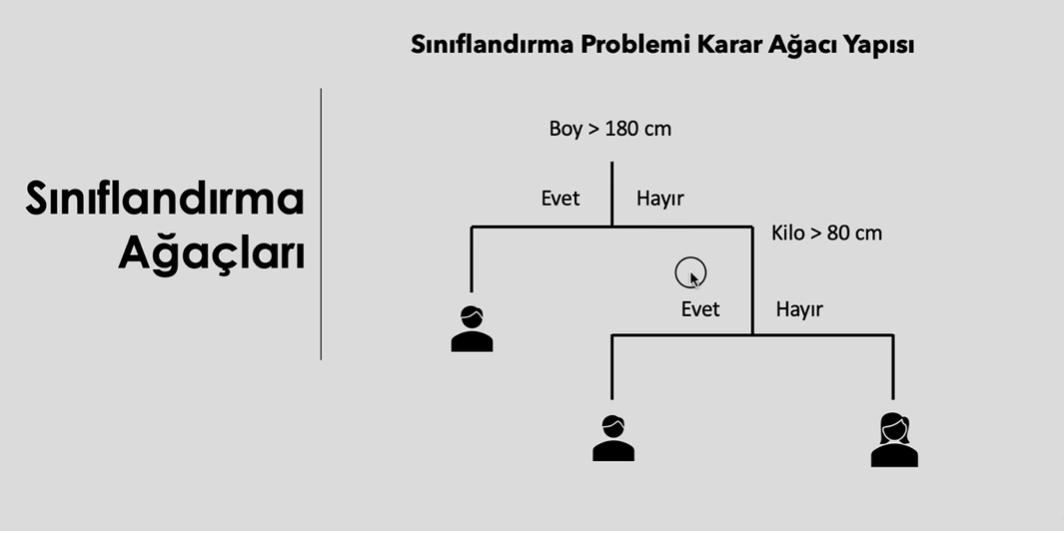

### Uygulama

#### 1.Model ve Tahmin

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
cart = DecisionTreeClassifier(max_depth = 2) # kolay okunabilmesi için 2 dedik
?cart

In [89]:
cart_model = cart.fit(X_train, y_train)

In [90]:
!pip install skompiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 KB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54331 sha256=2c1e55a353f773ea48dc405c6ff4fec8afe244b39f0d4a24aa01f63f09eb1a2f
  Stored in directory: /root/.cache/pip/wheels/eb/73/c6/cf0fc98d965e01e8bb3b1923d1e6a57374645d5d055f00e898
Successfully built skompiler


In [91]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((0 if x[7] <= 28.5 else 0) if x[1] <= 127.5 else 0 if x[5] <= 
    29.84999942779541 else 1)



In [92]:
x = [9]

In [93]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [94]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7748917748917749

#### 2.Model Tuning

In [95]:
?cart_model

In [96]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [97]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [98]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 6, 'min_samples_split': 39}


In [99]:
cart = tree.DecisionTreeClassifier(max_depth = cart_cv_model.best_params_["max_depth"], min_samples_split = cart_cv_model.best_params_["min_samples_split"])
cart_tuned = cart.fit(X_train, y_train)

In [100]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## RANDOM FOREST - RF

### Teori

Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır. (Breiman 2001)

### Uygulama

#### 1.Model ve Tahmin

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [103]:
rf_model

RandomForestClassifier()

In [103]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

#### 2.Model Tuning

In [104]:
rf_model

RandomForestClassifier()

In [105]:
?rf_model

In [106]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}

In [107]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [109]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [110]:
print("En iyi parametreler: " + str(rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'max_features': 8, 'min_samples_split': 10, 'n_estimators': 500}


In [111]:
#final

In [112]:
rf_tuned = RandomForestClassifier(max_depth = rf_cv_model.best_params_["max_depth"], 
                                  max_features = rf_cv_model.best_params_["max_features"], 
                                  min_samples_split = rf_cv_model.best_params_["min_samples_split"],
                                  n_estimators = rf_cv_model.best_params_["n_estimators"])

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=8, min_samples_split=10,
                       n_estimators=500)

In [113]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

In [114]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

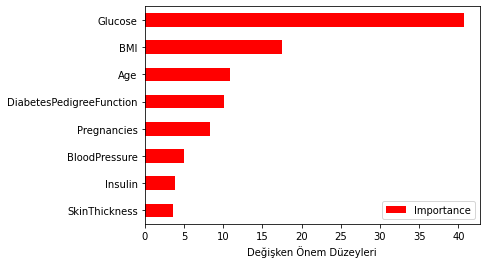

In [115]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Değişken Önem Düzeyleri")

## GRADIENT BOOSTING MACHINES

### Teori

### Uygulama

#### 1.Model ve Tahmin

In [116]:
from sklearn.ensemble import GradientBoostingClassifier

In [117]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [118]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

#### 2.Model Tuning

In [119]:
gbm_model

GradientBoostingClassifier()

In [120]:
?gbm_model

In [121]:
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [122]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)

In [124]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [125]:
print("En iyi parametreler: " + str(gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


In [126]:
gbm = GradientBoostingClassifier(learning_rate = gbm_cv.best_params_["learning_rate"], 
                                 max_depth = gbm_cv.best_params_["max_depth"],
                                min_samples_split = gbm_cv.best_params_["min_samples_split"],
                                n_estimators = gbm_cv.best_params_["n_estimators"])

In [127]:
gbm_tuned =  gbm.fit(X_train,y_train)

In [128]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## XGBOOST

### Uygulama

#### 1.Model ve Tahmin

In [129]:
!pip install xgboost
from xgboost import XGBClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [131]:
xgb_model

XGBClassifier()

In [132]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

#### 2.Model Tuning

In [133]:
xgb_model

XGBClassifier()

In [134]:
?xgb_model

In [135]:
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}

In [136]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)

In [138]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [139]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.6}

In [140]:
xgb = XGBClassifier(learning_rate = xgb_cv_model.best_params_["learning_rate"], 
                    max_depth = xgb_cv_model.best_params_["max_depth"],
                    min_samples_split = xgb_cv_model.best_params_["min_samples_split"],
                    n_estimators = xgb_cv_model.best_params_["n_estimators"],
                    subsample = xgb_cv_model.best_params_["subsample"])

In [141]:
xgb_tuned =  xgb.fit(X_train,y_train)

In [142]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## LIGHT GBM

###Uygulama

#### 1.Model ve Tahmin

In [143]:
!pip install lightgbm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [144]:
from lightgbm import LGBMClassifier

In [145]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

In [146]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

#### 2.Model Tuning

In [147]:
lgbm_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_child_samples": [5,10,20]}

In [148]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2)


In [150]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [151]:
lgbm_cv_model.best_params_

{'learning_rate': 0.02,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [152]:
lgbm = LGBMClassifier(learning_rate = 0.01, 
                       max_depth = 3,
                       subsample = 0.6,
                       n_estimators = 500,
                       min_child_samples = 20)

In [153]:
lgbm_tuned = lgbm.fit(X_train,y_train)

In [154]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## CATBOOST

### Uygulama

In [155]:
#### 1.Model ve Tahmin

In [156]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [157]:
cat_model = CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6889808	total: 49ms	remaining: 48.9s
1:	learn: 0.6849194	total: 50.4ms	remaining: 25.2s
2:	learn: 0.6814604	total: 52ms	remaining: 17.3s
3:	learn: 0.6772672	total: 53ms	remaining: 13.2s
4:	learn: 0.6739398	total: 54ms	remaining: 10.7s
5:	learn: 0.6698660	total: 55.4ms	remaining: 9.18s
6:	learn: 0.6663256	total: 56.4ms	remaining: 8.01s
7:	learn: 0.6628033	total: 57.5ms	remaining: 7.13s
8:	learn: 0.6591887	total: 58.5ms	remaining: 6.44s
9:	learn: 0.6556496	total: 59.9ms	remaining: 5.93s
10:	learn: 0.6518782	total: 61.7ms	remaining: 5.55s
11:	learn: 0.6493726	total: 63.1ms	remaining: 5.19s
12:	learn: 0.6457618	total: 64.3ms	remaining: 4.88s
13:	learn: 0.6430184	total: 65.5ms	remaining: 4.62s
14:	learn: 0.6396533	total: 66.7ms	remaining: 4.38s
15:	learn: 0.6363750	total: 67.8ms	remaining: 4.17s
16:	learn: 0.6326978	total: 69ms	remaining: 3.99s
17:	learn: 0.6296719	total: 70ms	remaining: 3.82s
18:	learn: 0.6264215	total: 71.5ms	remaining: 3.69s
19:	le

In [158]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

In [159]:
#### 2.Model Tuning

In [160]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [161]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6382892	total: 3.09ms	remaining: 615ms
1:	learn: 0.5957742	total: 5.4ms	remaining: 535ms
2:	learn: 0.5531582	total: 7.99ms	remaining: 525ms
3:	learn: 0.5255243	total: 10.4ms	remaining: 509ms
4:	learn: 0.4972998	total: 12.9ms	remaining: 505ms
5:	learn: 0.4729587	total: 16.1ms	remaining: 520ms
6:	learn: 0.4558936	total: 18.5ms	remaining: 511ms
7:	learn: 0.4393270	total: 20.7ms	remaining: 496ms
8:	learn: 0.4252905	total: 22.8ms	remaining: 483ms
9:	learn: 0.4080392	total: 26.1ms	remaining: 495ms
10:	learn: 0.3929177	total: 28.6ms	remaining: 491ms
11:	learn: 0.3786105	total: 30.8ms	remaining: 482ms
12:	learn: 0.3727786	total: 33.1ms	remaining: 476ms
13:	learn: 0.3595674	total: 35.3ms	remaining: 469ms
14:	learn: 0.3527055	total: 37.5ms	remaining: 463ms
15:	learn: 0.3423194	total: 39.8ms	remaining: 457ms
16:	learn: 0.3367352	total: 42ms	remaining: 452ms
17:	learn: 0.3308263	total: 45ms	remaining: 455ms
18:	learn: 0.32431

{'depth': 8, 'iterations': 200, 'learning_rate': 0.1}

In [162]:
catb = CatBoostClassifier(iterations = catb_cv_model.best_params_["iterations"], 
                          learning_rate = catb_cv_model.best_params_["learning_rate"], 
                          depth = catb_cv_model.best_params_["depth"])

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6382892	total: 3ms	remaining: 597ms
1:	learn: 0.5957742	total: 5.99ms	remaining: 593ms
2:	learn: 0.5531582	total: 8.56ms	remaining: 562ms
3:	learn: 0.5255243	total: 11.1ms	remaining: 542ms
4:	learn: 0.4972998	total: 17.2ms	remaining: 671ms
5:	learn: 0.4729587	total: 20.2ms	remaining: 652ms
6:	learn: 0.4558936	total: 22.9ms	remaining: 632ms
7:	learn: 0.4393270	total: 26.6ms	remaining: 639ms
8:	learn: 0.4252905	total: 29.4ms	remaining: 625ms
9:	learn: 0.4080392	total: 32ms	remaining: 607ms
10:	learn: 0.3929177	total: 34.4ms	remaining: 591ms
11:	learn: 0.3786105	total: 36.8ms	remaining: 577ms
12:	learn: 0.3727786	total: 39.2ms	remaining: 564ms
13:	learn: 0.3595674	total: 41.6ms	remaining: 552ms
14:	learn: 0.3527055	total: 43.9ms	remaining: 542ms
15:	learn: 0.3423194	total: 46.5ms	remaining: 534ms
16:	learn: 0.3367352	total: 48.8ms	remaining: 526ms
17:	learn: 0.3308263	total: 51.2ms	remaining: 518ms
18:	learn: 0.3243117	total: 55.9ms	remaining: 533ms
19:	learn: 0.3163914	total:

In [163]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

## Tüm Modellerin karşılaştırılması

In [164]:
modeller = [
    knn_tuned_model,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
    
]


for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(isimler + ":" )
    print("Accuracy: {:.4%}".format(dogruluk))

----------------------------
KNeighborsClassifier:
Accuracy: 74.4589%
----------------------------
LogisticRegression:
Accuracy: 74.0260%
----------------------------
SVC:
Accuracy: 76.1905%
----------------------------
GaussianNB:
Accuracy: 73.5931%
----------------------------
MLPClassifier:
Accuracy: 38.0952%
----------------------------
DecisionTreeClassifier:
Accuracy: 74.8918%
----------------------------
RandomForestClassifier:
Accuracy: 76.6234%
----------------------------
GradientBoostingClassifier:
Accuracy: 75.3247%
----------------------------
CatBoostClassifier:
Accuracy: 75.3247%
----------------------------
LGBMClassifier:
Accuracy: 74.8918%
----------------------------
XGBClassifier:
Accuracy: 75.3247%


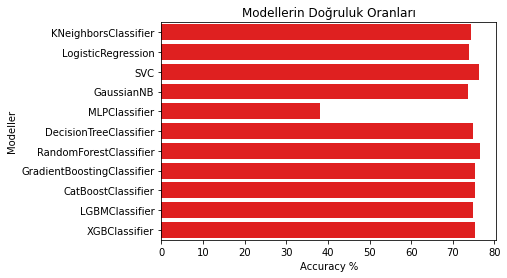

In [165]:
sonuc = []

sonuclar = pd.DataFrame(columns= ["Modeller","Accuracy"])

for model in modeller:
    isimler = model.__class__.__name__
    y_pred = model.predict(X_test)
    dogruluk = accuracy_score(y_test, y_pred)    
    sonuc = pd.DataFrame([[isimler, dogruluk*100]], columns= ["Modeller","Accuracy"])
    sonuclar = sonuclar.append(sonuc)
    
    
sns.barplot(x= 'Accuracy', y = 'Modeller', data=sonuclar, color="r")
plt.xlabel('Accuracy %')
plt.title('Modellerin Doğruluk Oranları');    